In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sys
import os

# Add the root of your project to sys.path
project_root = os.path.abspath('..')  # or '.' if your notebook is in root
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [52]:
%load_ext autoreload
%autoreload 2

In [54]:
import importlib
import src.eda
importlib.reload(src.eda)

<module 'src.eda' from '/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py'>

In [3]:
input_path = './../data/processed/After_03_Fixing_Outliers.csv'
df = pd.read_csv(input_path)

In [4]:
df.head()

,Name,Sound_3.5mmjack,Brand,Model,has_LTE,has_5G,has_CDMA,has_CDMA2000,has_EVDO,number_of_sims,...,max_FPS,ram,Total_Pixels,number_of_camera_features,maincamera_mp,selfiecamera_mp,latest_wifi_version,Bluetooth_version,has_nfc,USB_Type
0,Meizu PRO 5 mini,Yes,Meizu,PRO 5 mini,1.0,0.0,0.0,0.0,0.0,2.0,...,30,3,2073600.0,3.0,16,5,2,4.1,0.0,Type-B
1,ZTE Blade 11 Prime,Yes,ZTE,Blade 11 Prime,1.0,0.0,0.0,0.0,0.0,2.0,...,30,4,1152000.0,3.0,16,8,2,5.1,0.0,Type-C
2,Umidigi One Max,Yes,Umidigi,One Max,1.0,0.0,1.0,0.0,1.0,2.0,...,30,4,1094400.0,3.0,12,16,1,4.1,1.0,Type-C
3,Coolpad 3632,Yes,Coolpad,3632,1.0,0.0,0.0,0.0,0.0,2.0,...,30,1,409920.0,2.0,5,2,1,4.0,0.0,Type-B
4,Coolpad Porto,Yes,Coolpad,Porto,1.0,0.0,0.0,0.0,0.0,1.0,...,30,1,518400.0,1.0,8,5,1,4.0,0.0,Type-B


In [5]:
category_columns = ['CPU_Transistor_Size', 'Sound_3.5mmjack', 'Brand', 'has_GSM', 'has_UMTS', 'has_HSPA', 'has_LTE', 'has_5G', 'has_CDMA', 'has_CDMA2000', 'has_EVDO', 'number_of_sims', 'number_of_2g_bands', 'aws_support', 'number_of_3g_bands', 'is_foldable_phone', 'has_Nano_SIM', 'has_Micro_SIM', 'has_Mini_SIM', 'has_eSIM', 'has_SIM_Type_Specified', 'has_memory_card', 'memory_type_microSDXC', 'memory_type_microSDHC', 'memory_type_microSD', 'memory_type_SD', 'memory_type_Nano_Memory', 'Battery_Is_removable', 'Battery_Type_Lithium', 'Sound_has_stereo_speakers', 'camera_hdr', 'camera_laser_af', 'camera_panorama', 'GPU_company', 'Number_of_cores', 'CPU_Brand', 'Is_OS_Upgradable', 'os_version', 'Resolution_Width', 'Resolution_Height', 'has_8k',	'has_4k',	'has_1440p',	'has_1080p',	'has_720p',	'has_480p',	'has_EIS',	'has_HDR',	'has_stereo',	'has_dolby_vision',	'has_OIS'	,'max_resolution',	'max_FPS',	'ram', 'number_of_camera_features',	'maincamera_mp',	'selfiecamera_mp',	'latest_wifi_version',	'Bluetooth_version',	'has_nfc',	'USB_Type']
for col in category_columns:
    try:
        df[col] = df[col].astype('category')
    except:
        pass

#### Identifying Numerical and Categorical columns


In [6]:
numerical_cols = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

#### Checking the correaltion between Numerical Columns


<Axes: >

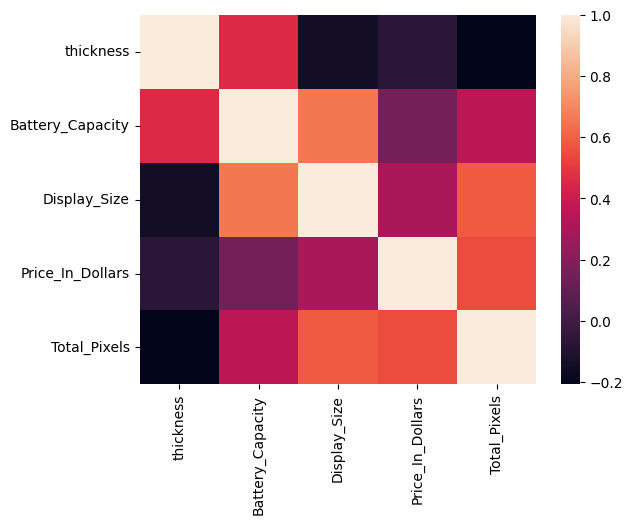

In [7]:
sns.heatmap(df[numerical_cols].corr())

#### Numerical Cols Correlation:

    - Total Pixels, CPU_Transistor_Size and Display_Size have a good correaltion with the target column

    Observations:

        - There is no multicollinearity between columns.
        - The correaltion between columns is not by chance but it is statistically significant.


<Axes: >

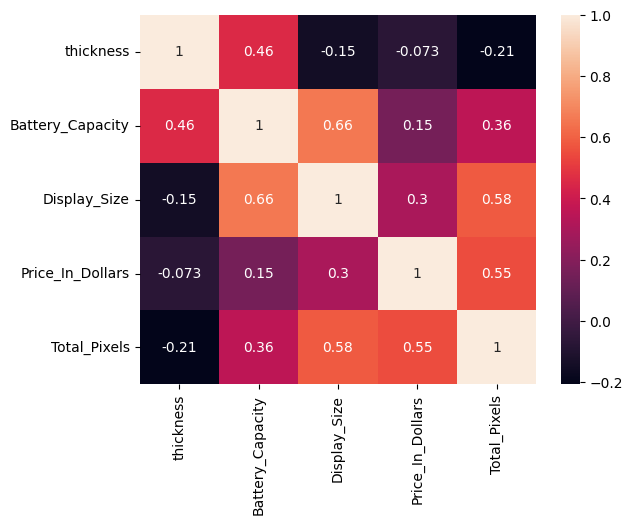

In [8]:
sns.heatmap(df[numerical_cols].corr(), annot = df[numerical_cols].corr())

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df[numerical_cols].dropna()  
X = add_constant(X)  
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_df)


            Feature         VIF
0             const  250.139046
1         thickness    2.492898
2  Battery_Capacity    4.289818
3      Display_Size    3.688913
4  Price_In_Dollars    1.460949
5      Total_Pixels    2.070039


In [10]:
from scipy.stats import pearsonr

visited_columns = set()

for column1 in numerical_cols:

    for column2 in numerical_cols:

        if column1 == column2 or (column2, column1) in visited_columns:
            continue

        filtered_df = df[~df[column1].isna() & ~df[column2].isna()][[column1, column2]]

        test_statistic, p_value = pearsonr(filtered_df[column1], filtered_df[column2])

        if p_value > 0.05:
            print(f'Relationship between {column1} and {column2} is temporary')
        else:
            print(f'Relationship between {column1} and {column2} is Permanent')

        visited_columns.add((column1, column2))


Relationship between thickness and Battery_Capacity is Permanent
Relationship between thickness and Display_Size is Permanent
Relationship between thickness and Price_In_Dollars is Permanent
Relationship between thickness and Total_Pixels is Permanent
Relationship between Battery_Capacity and Display_Size is Permanent
Relationship between Battery_Capacity and Price_In_Dollars is Permanent
Relationship between Battery_Capacity and Total_Pixels is Permanent
Relationship between Display_Size and Price_In_Dollars is Permanent
Relationship between Display_Size and Total_Pixels is Permanent
Relationship between Price_In_Dollars and Total_Pixels is Permanent


#### Observations from Pair plot

    Diagonals:
        - Thickness seems very normal, but has some outliers.
        - Battery capacity has some repeated values.
        - CPU Transistor size is mor eof a categorical than numerical.
        - Price in dollars looks good => Just needs transformation.

    Relationship with Target column:
        - The thickness column seems scattered => No relationship.
        - Total pixels and Displaysize have positive relationship.

    Multicollinearity :
        - There is a clear linear relationship between thickness and battery capacity(Makes sense).


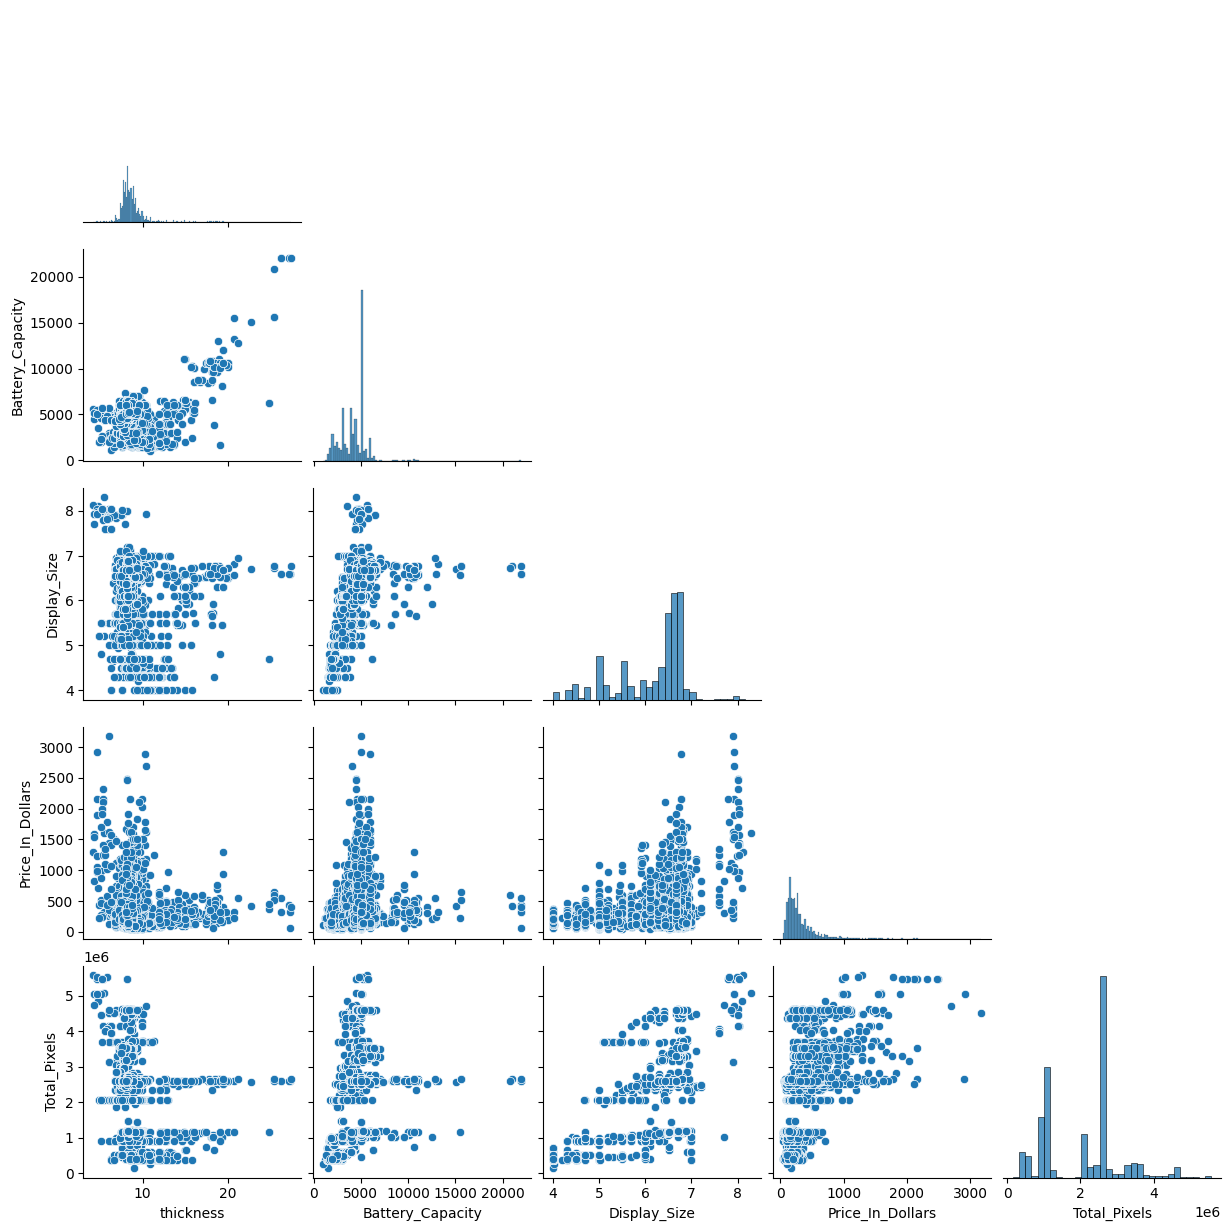

In [11]:
sns.pairplot(df[numerical_cols], corner = True)

#### Categorical Cols and Target column Correlation


#### Observations:

    1. Brand : Highly informative categorical feature.
        It captures:
            - Build quality.
            - Flagship vs entry level.


In [12]:
low_cardinality_features = [column for column in categorical_cols if df[column].nunique() < 5]
medium_cardinality_features = [column for column in categorical_cols if df[column].nunique() < 20 and df[column].nunique() >= 5]
high_cardinality_features = [column for column in categorical_cols if df[column].nunique() >= 20]

##### Low Cardinality Features

    Useful:
        - Sound_3.5mm jack
        - has_LTE
        - has_5G
        - has_CDMA
        - has_CDMA2000
        - has_EVDO
        - number_of_sims

    Research:
        - number_of_2g_bands : It's better to combine 2 and 3.

    Not Useful:
        - camera_laser_af


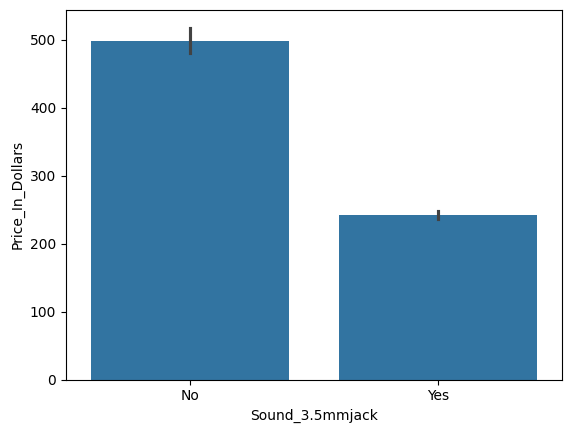

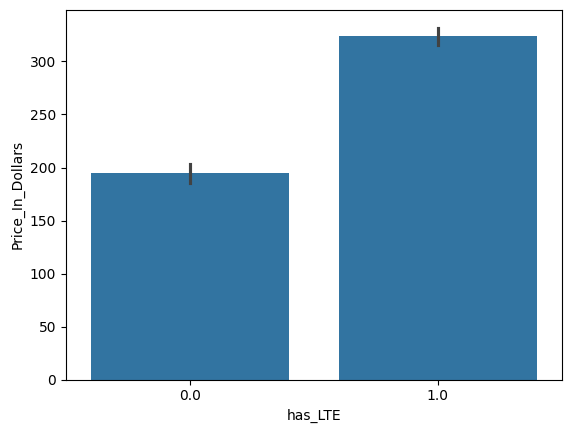

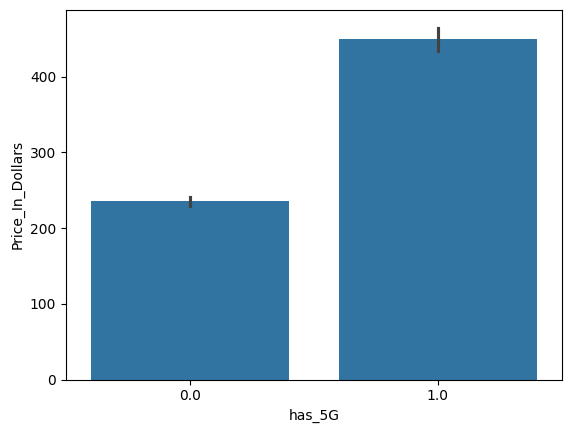

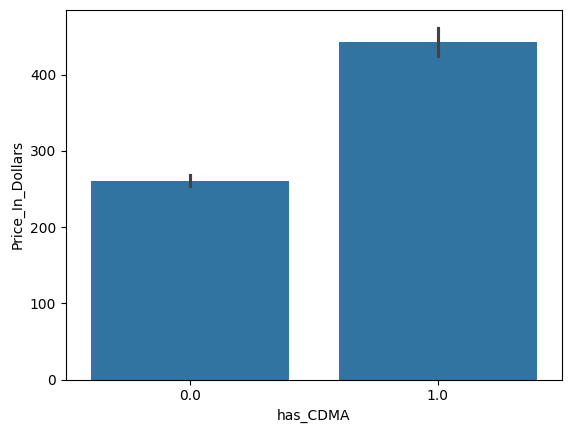

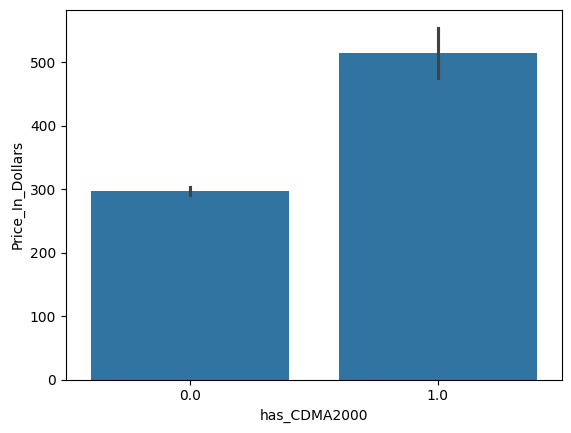

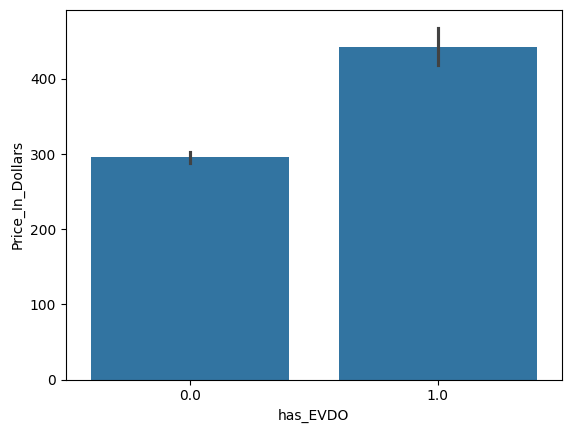

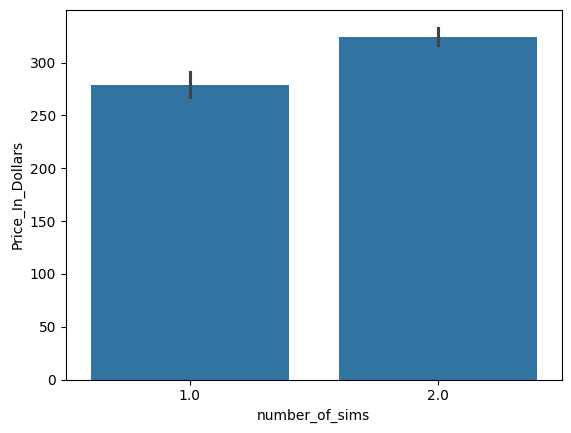

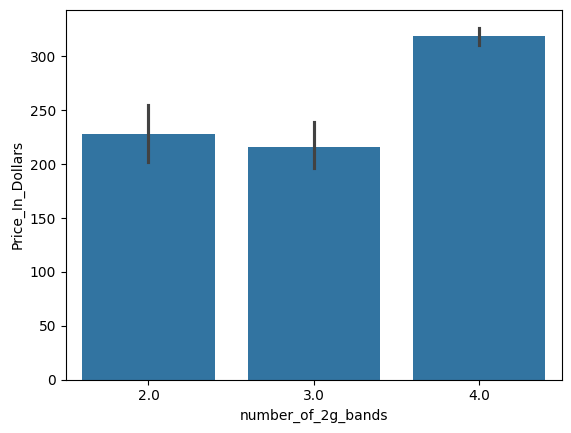

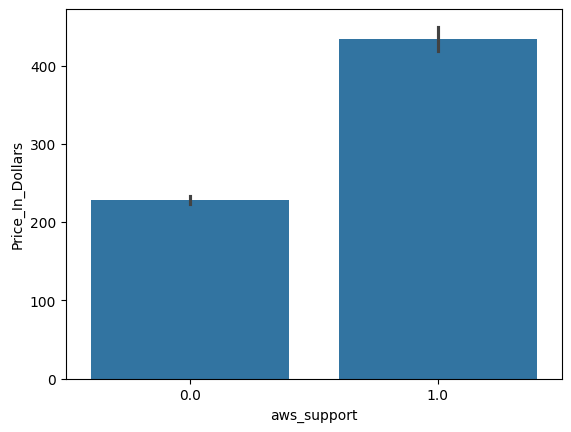

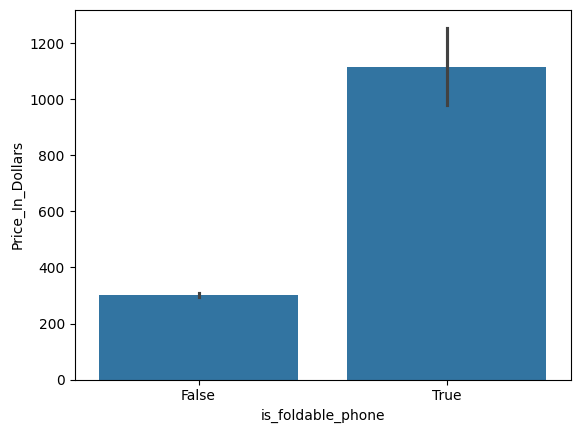

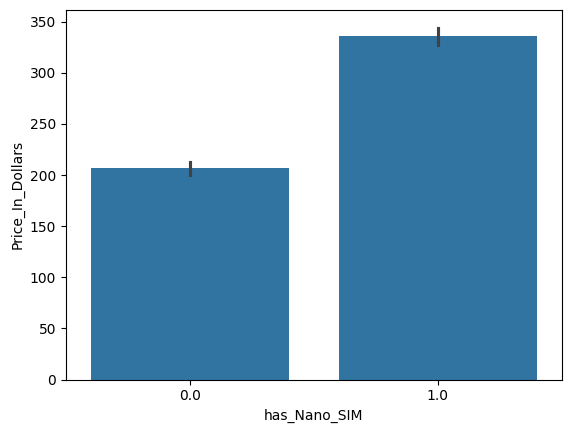

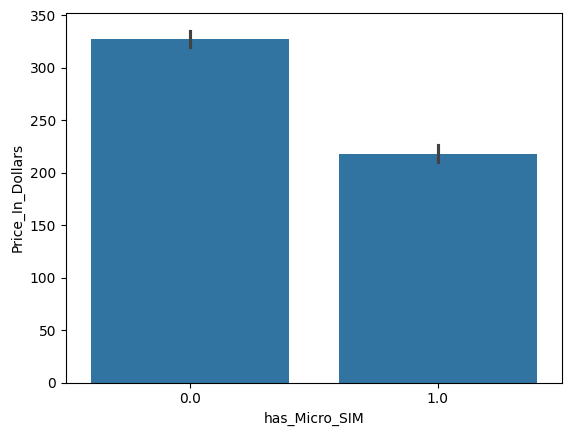

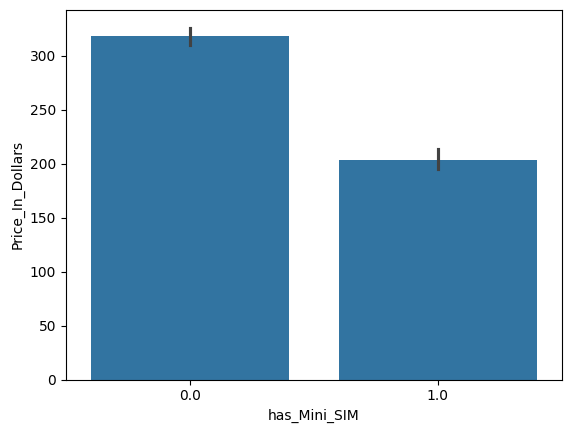

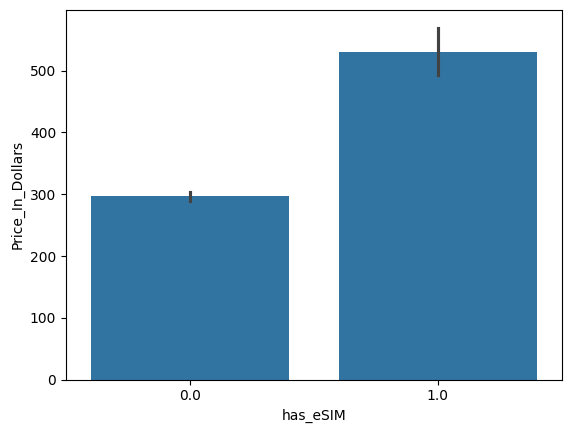

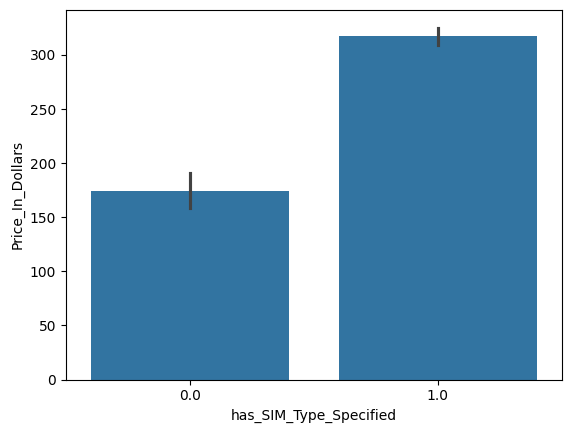

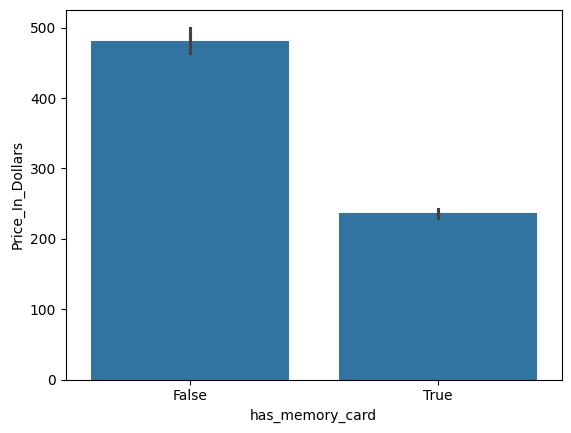

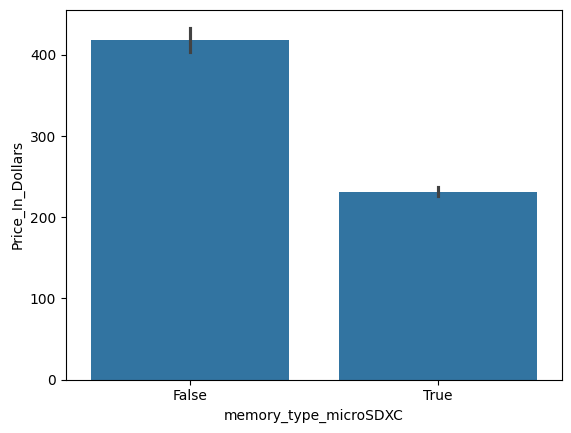

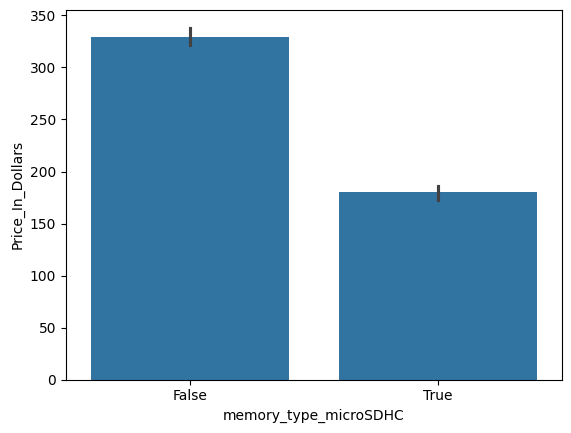

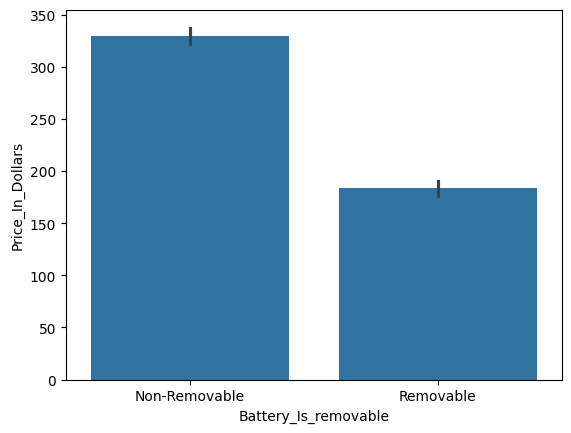

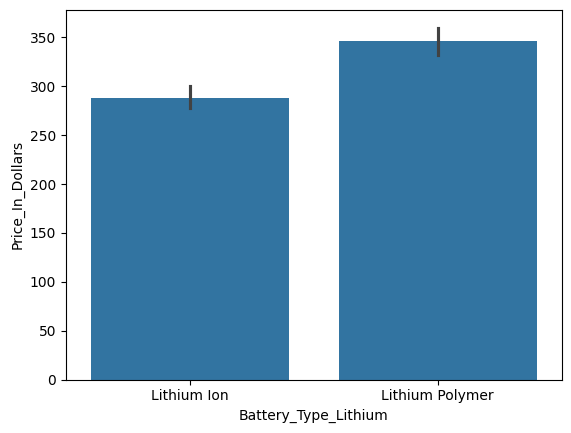

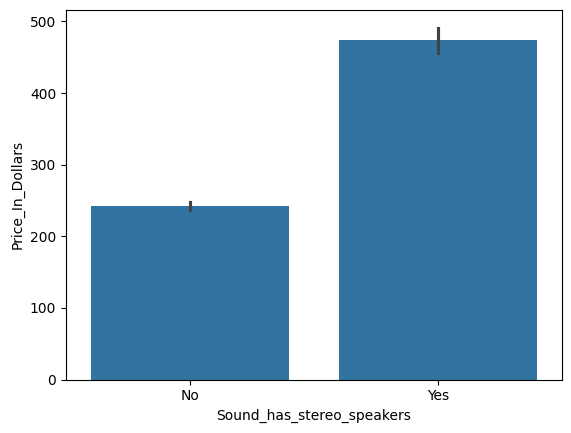

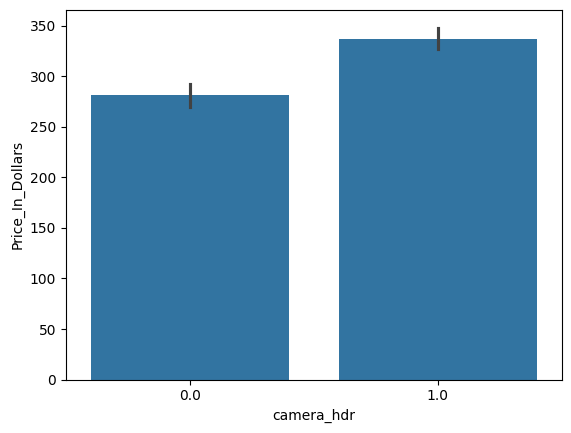

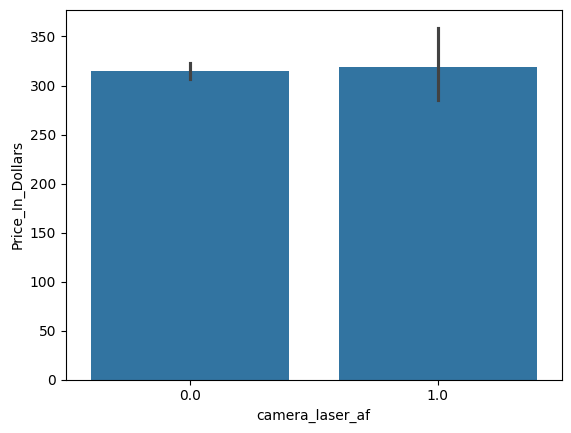

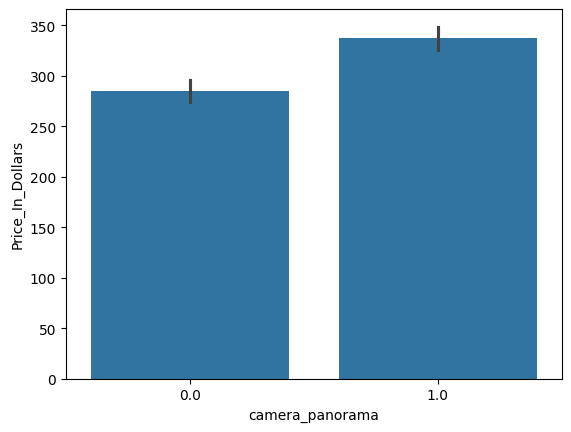

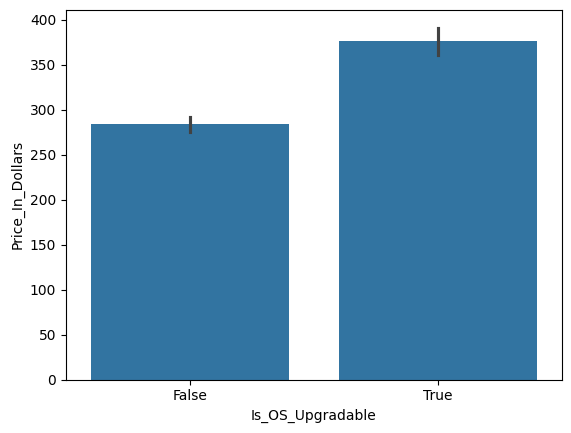

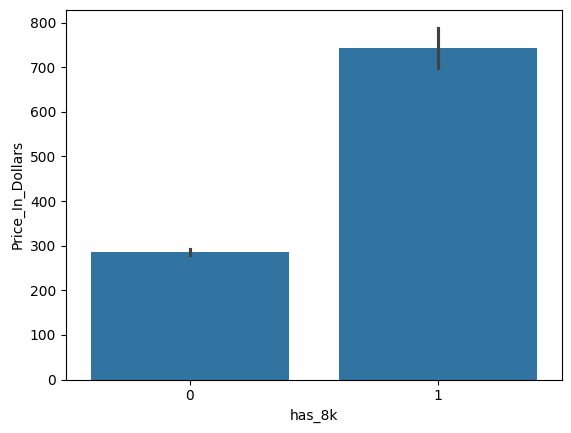

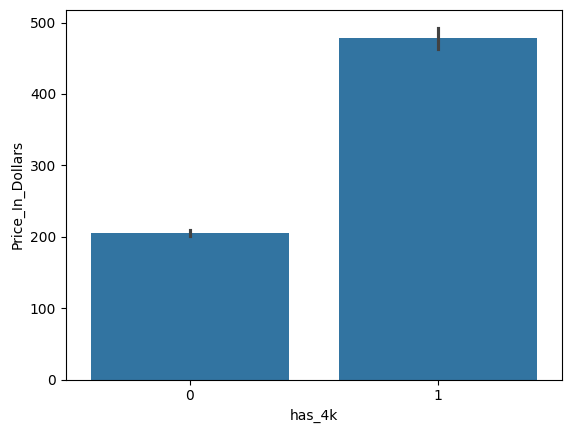

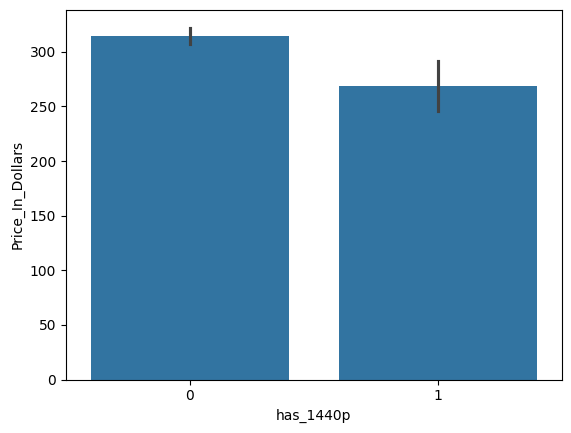

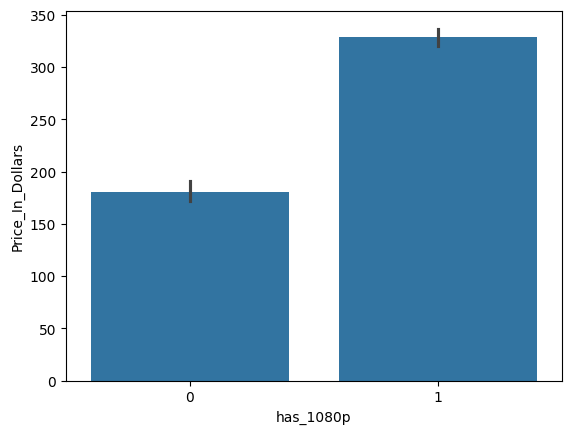

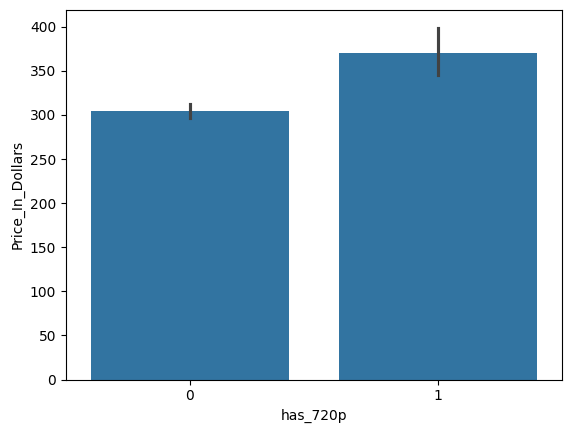

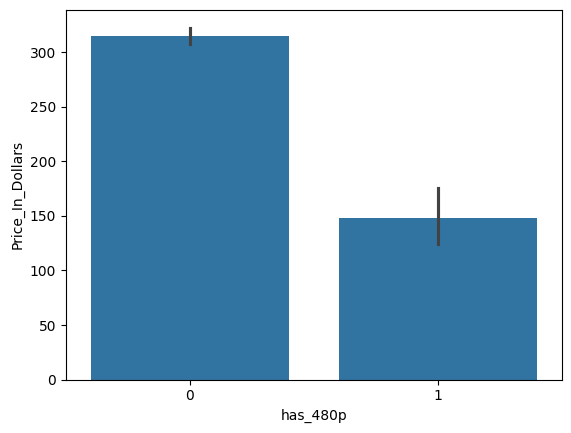

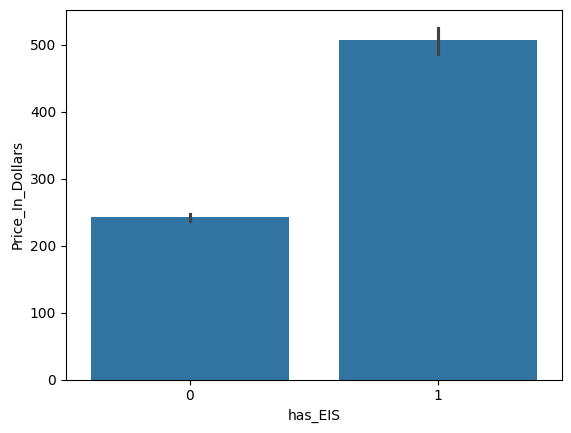

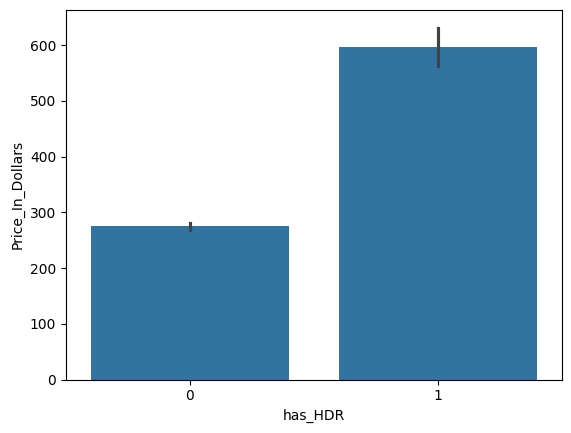

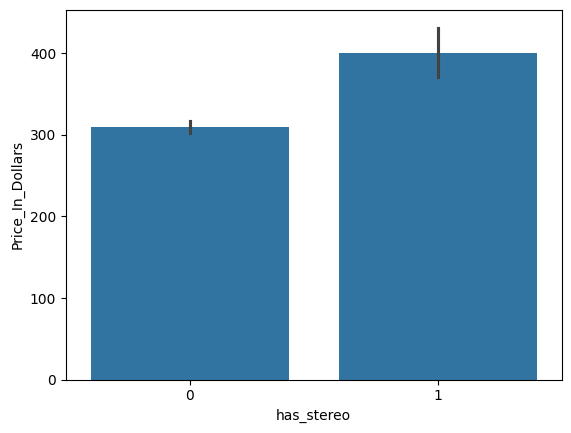

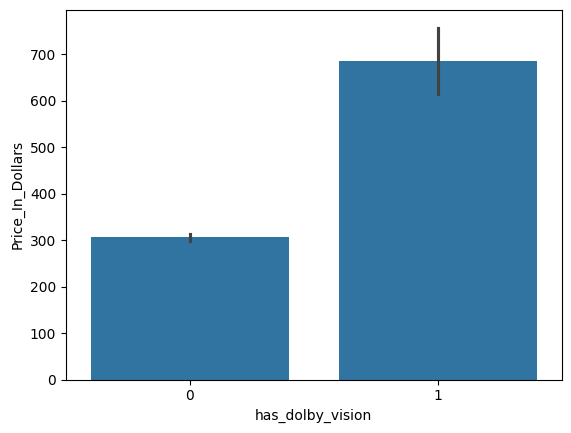

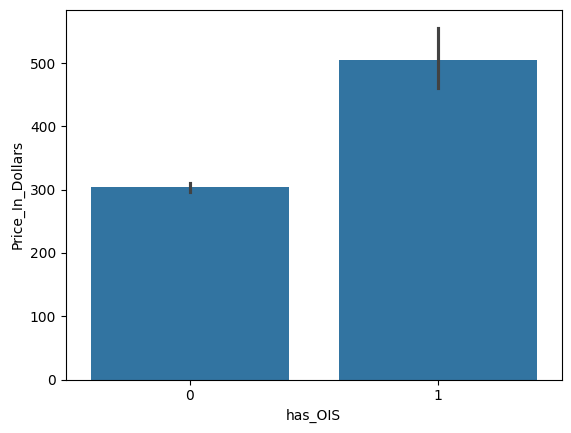

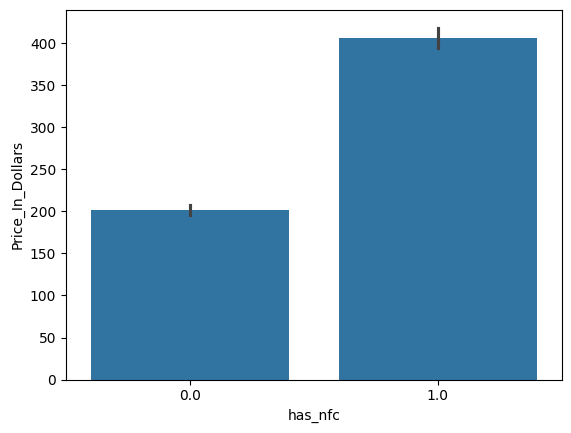

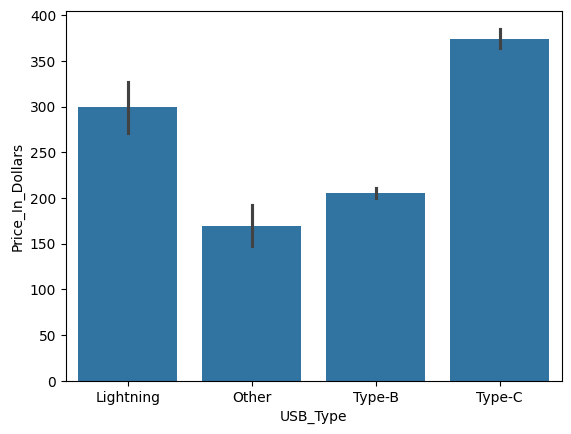

In [13]:
for column in low_cardinality_features:
    sns.barplot(data = df, x = column, y = 'Price_In_Dollars')
    plt.show()

##### Medium Cardinality Features

    Useful:
        - GPU Company has good variation.

    Not Useful:
        -

    Research:
        - Number_of_cores:
            - I think single and dual and quad cores can be merged as they have the same average price.

            - Group: Single, dual and quad as Low end.
            -       Hexa and octa as medium.
                    Deca as high.
            - After the transformation, the cores represent the clear dictinction between the prices.


        - Number_of_3g_bands
            - Merge 0 with 1 and 7 with 6.


###### Number of cores


<Axes: xlabel='Number_of_cores', ylabel='Price_In_Dollars'>

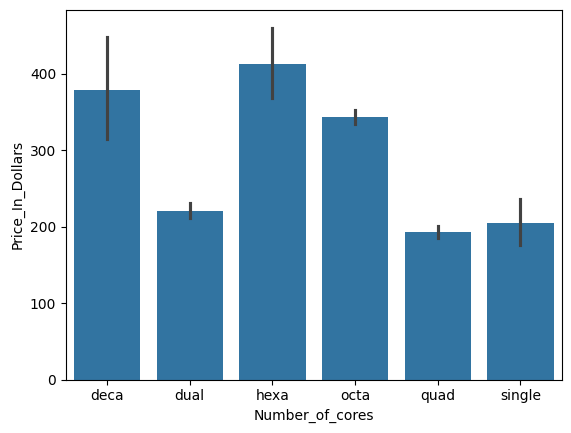

In [14]:
# Before Transformation

sns.barplot(x = df['Number_of_cores'], y = df['Price_In_Dollars'])

In [48]:
# After Transformation

from src.eda import group_cores

tempdf = df[['Number_of_cores']]

tempdf['Number_of_cores'] = tempdf['Number_of_cores'].apply(group_cores)

sns.barplot(x = tempdf['Number_of_cores'], y = df['Price_In_Dollars'])

ImportError: cannot import name 'group_cores' from 'src.eda' (/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py)

###### number_of_3g_bands


<Axes: xlabel='number_of_3g_bands', ylabel='Price_In_Dollars'>

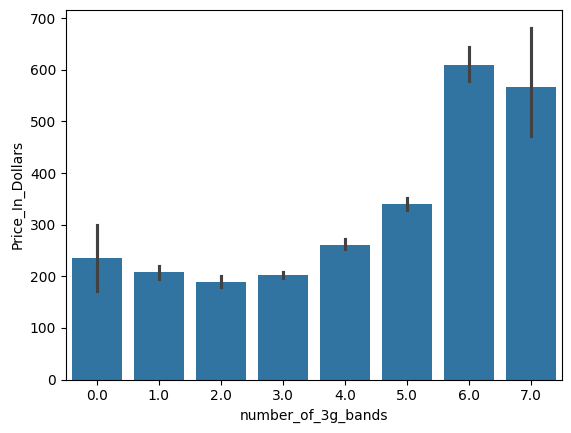

In [16]:
# Before transformation
sns.barplot(data = df, x = 'number_of_3g_bands', y = 'Price_In_Dollars')

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/1910573082.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['number_of_3g_bands_grouped'] = df['number_of_3g_bands']
/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/1910573082.py:4: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tempdf['number_of_3g_bands_grouped'] = tempdf['number_of_3g_bands_grouped'].replace({
/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/1910573082.py:4: SettingWithCopyWarning: 
A value is trying to be set 

<Axes: xlabel='number_of_3g_bands_grouped', ylabel='Price_In_Dollars'>

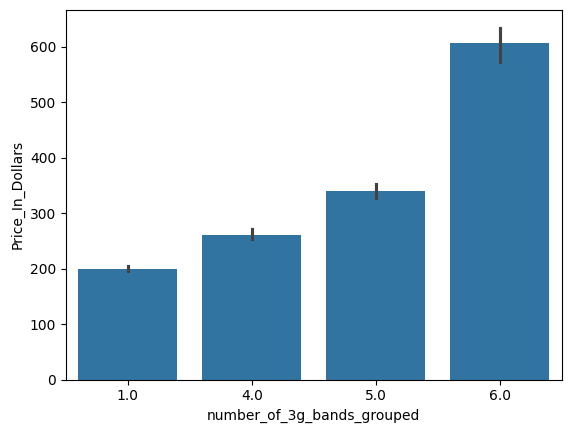

In [17]:

# After Transformation

tempdf['number_of_3g_bands_grouped'] = df['number_of_3g_bands']
tempdf['number_of_3g_bands_grouped'] = tempdf['number_of_3g_bands_grouped'].replace({
    0.0: 1.0,
    7.0: 6.0,
    2.0 : 1.0,
    3.0 : 1.0
})
sns.barplot(x = tempdf['number_of_3g_bands_grouped'], y = df['Price_In_Dollars'])

###### max_resolution

    - For all the values which are having 0,
        - Find their brand and identify the price ranges for each resolution.
        - Fill the 0's with the help of price range and brand.
        - Do this after splitting the dataset => Data leakage.


###### max_FPS

    - It looks like a unuseful column.
    - And highly correlates with max_resolution.
    - Do the same thing as max_resolution.


###### number_of_camera_features

    - Combine 0 - 2 and 3 - 5 and 6 + as groups.


<Axes: xlabel='number_of_camera_features', ylabel='Price_In_Dollars'>

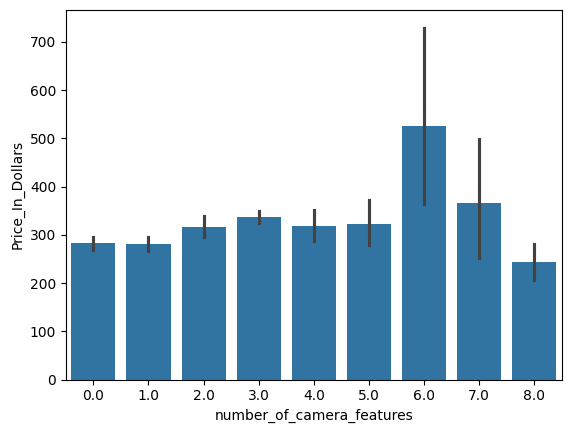

In [18]:
# Before Transformation
sns.barplot(x = df['number_of_camera_features'], y = df['Price_In_Dollars'])

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/3558552785.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['transformed'] = tempdf['number_of_camera_features'].apply(transform)


<Axes: xlabel='transformed', ylabel='Price_In_Dollars'>

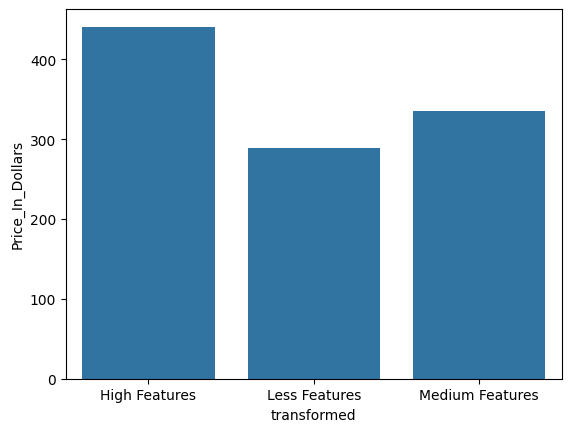

In [19]:
# After Transformation
def transform_camera_features(camera):
    if camera in [0.0, 1.0, 2.0]:
        return 'Less Features'
    elif camera in [3.0, 4.0, 5.0]:
        return 'Medium Features'
    else:
        return 'High Features'

tempdf = df[['number_of_camera_features', 'Price_In_Dollars']]

tempdf['transformed'] = tempdf['number_of_camera_features'].apply(transform)
sns.barplot(tempdf.groupby('transformed')['Price_In_Dollars'].mean())


###### ram

    - Combine it in the folllowing way.
    - <=4 and 6 - 8 and 12 - 16 and 16+.


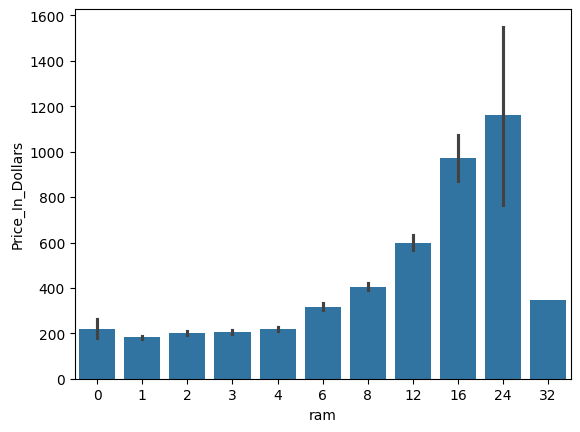

In [20]:
# Before transformation
sns.barplot(data = df, x = 'ram', y = 'Price_In_Dollars')
plt.show()

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/3649833803.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['newram'] = df['ram'].apply(transform_ram)


<Axes: xlabel='newram', ylabel='Price_In_Dollars'>

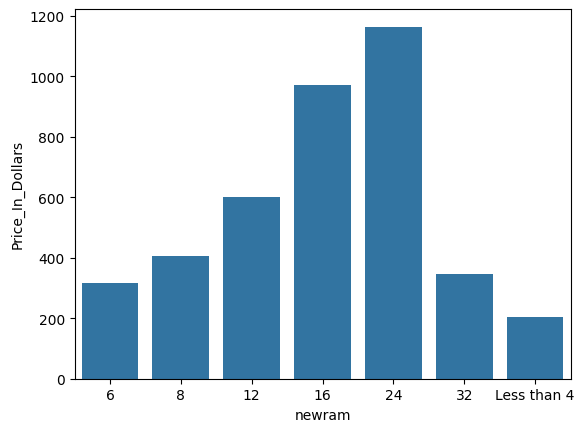

In [50]:
from src.eda import transform_ram

tempdf = df[['ram', 'Price_In_Dollars']]

tempdf['newram'] = df['ram'].apply(transform_ram)

sns.barplot(tempdf.groupby('newram')['Price_In_Dollars'].mean())


###### Bluetooth_version

    - Group as mentioned below


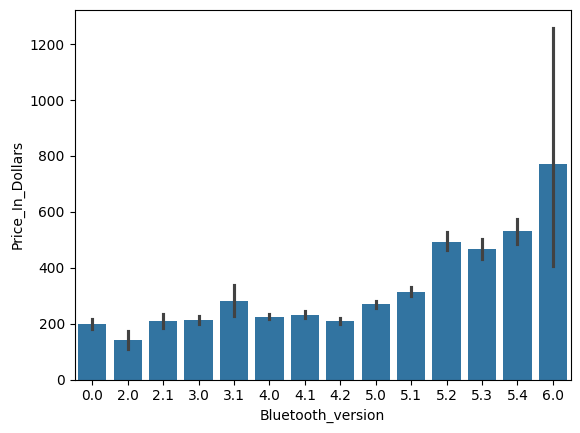

In [22]:
# Before transformation
sns.barplot(data = df, x = 'Bluetooth_version', y = 'Price_In_Dollars')
plt.show()

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/3029962217.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['newversion'] = tempdf['Bluetooth_version'].apply(transform_bluetooth_version)


<Axes: xlabel='newversion', ylabel='Price_In_Dollars'>

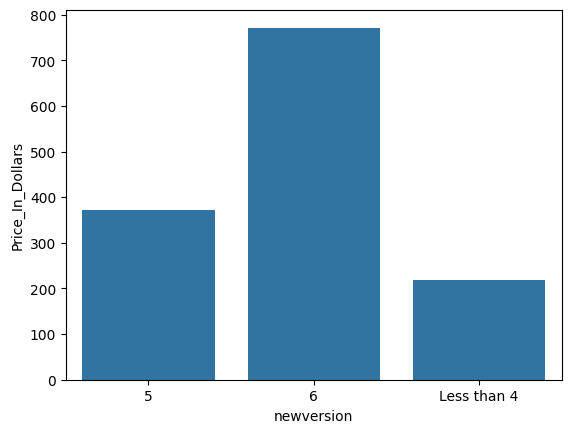

In [55]:
# After transformation
from src.eda import transform_bluetooth_version

tempdf = df[['Bluetooth_version', 'Price_In_Dollars']]

   
tempdf['newversion'] = tempdf['Bluetooth_version'].apply(transform_bluetooth_version)

sns.barplot(tempdf.groupby('newversion')['Price_In_Dollars'].mean())

#### aosms


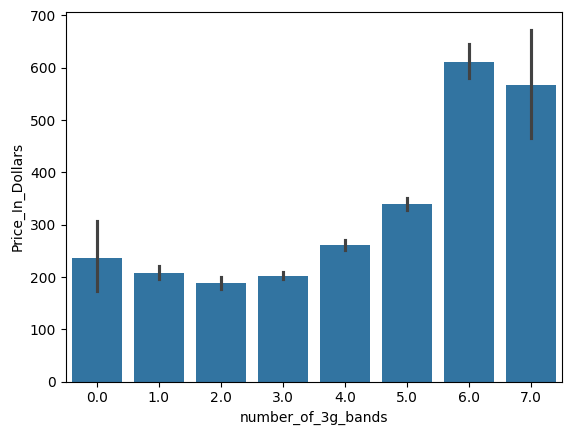

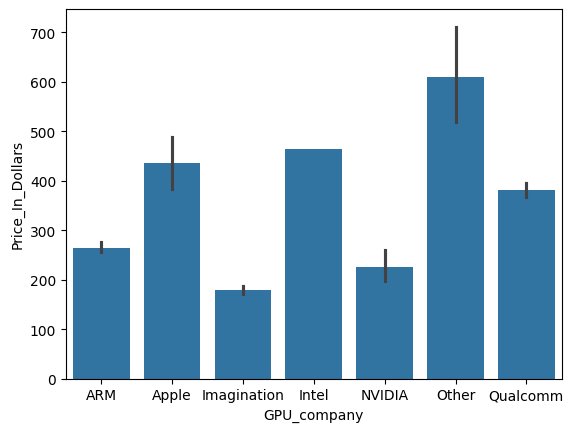

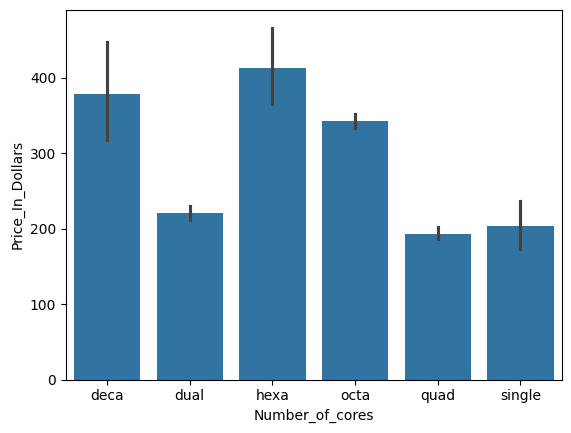

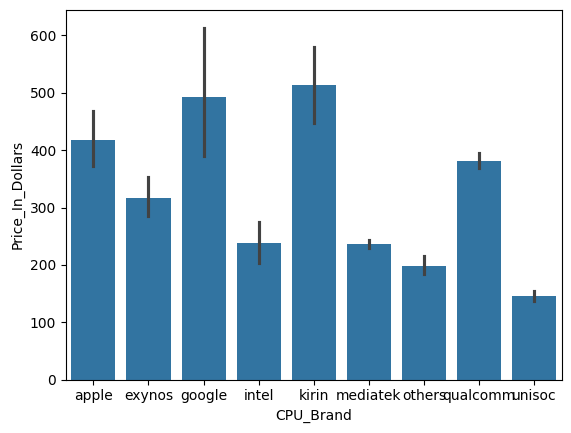

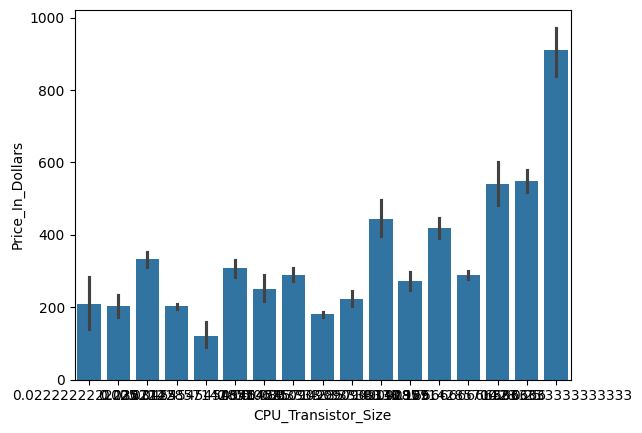

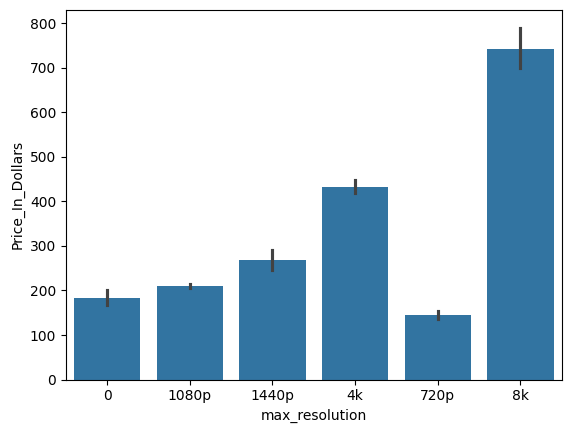

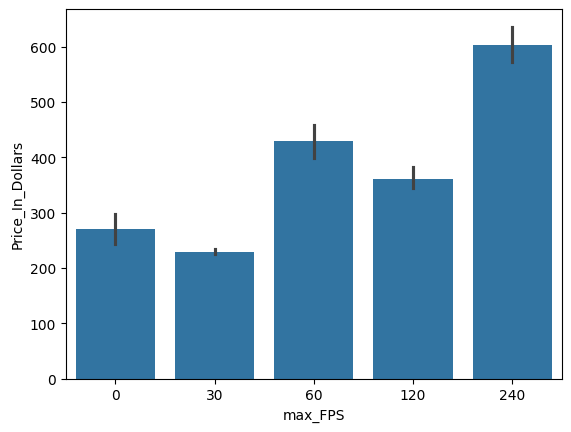

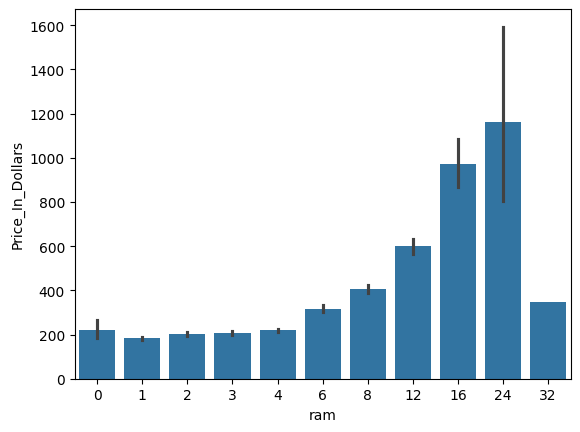

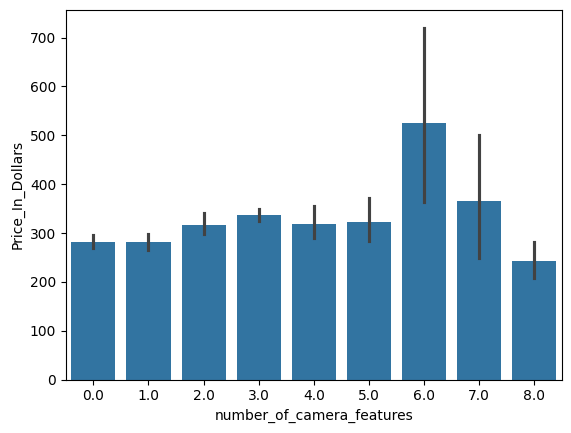

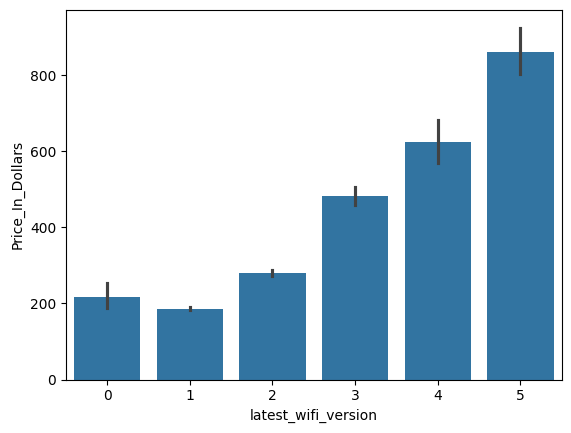

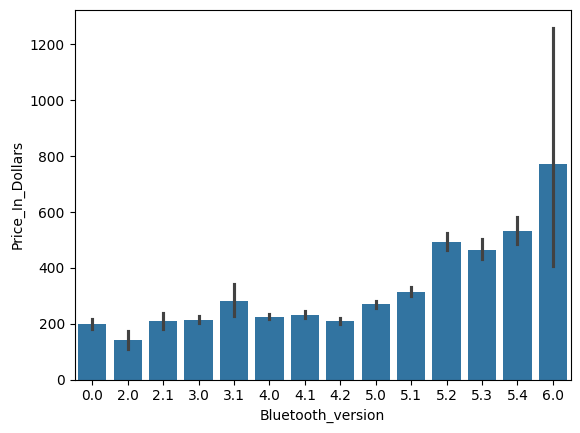

In [24]:
for column in medium_cardinality_features:
    sns.barplot(data = df, x = column, y = 'Price_In_Dollars')
    plt.show()

#### High Cardinality Columns


##### PPI

    - PPI has some weird textual values and either remove them or fill them with mean.
    - Then, convert it into integer column.


In [25]:
high_cardinality_features.remove('Name')
high_cardinality_features.remove('Model')
high_cardinality_features.remove('CPU_Model')

##### os_version

    - Extract only the actual os name instead of the versions.
    - There are some huawei phones which has os as missing value => Fill with Harmony.
    - For the rest of the phones, fill with android as most of them are android.


In [26]:
df['os_version'].unique()

['Android 5.1', 'Android 11', 'Android 8.1', 'Android 7.1', 'Android 7.0', ..., 'IOS 13', 'IOS 17', 'IOS 18', 'IOS 18.3', 'Harmony 14']
Length: 70
Categories (69, object): ['Android 10', 'Android 11', 'Android 12', 'Android 13', ..., 'Microsoft 8.1', 'bada 2.0', 'flyme os', 'tizen 2.4']

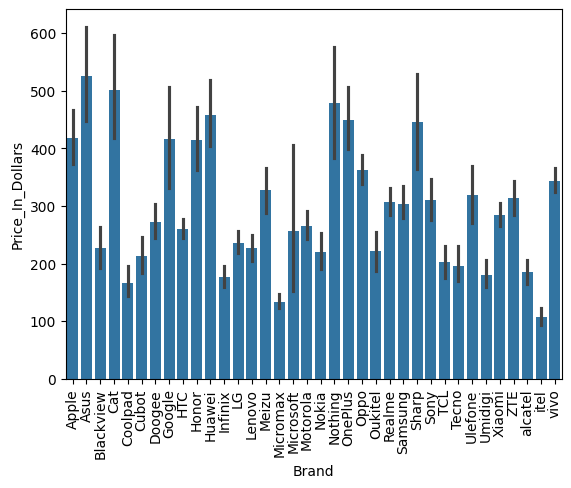

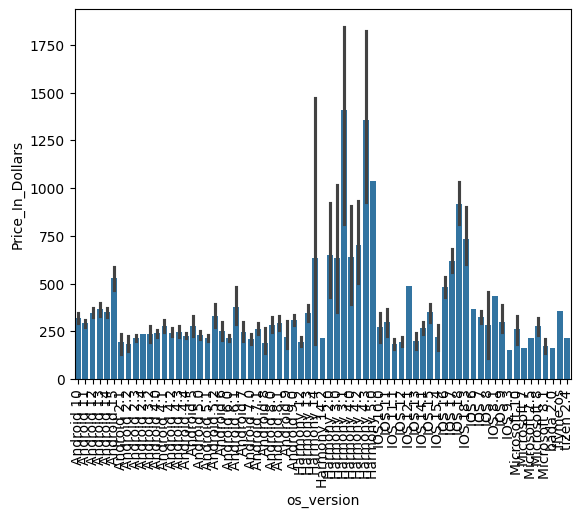

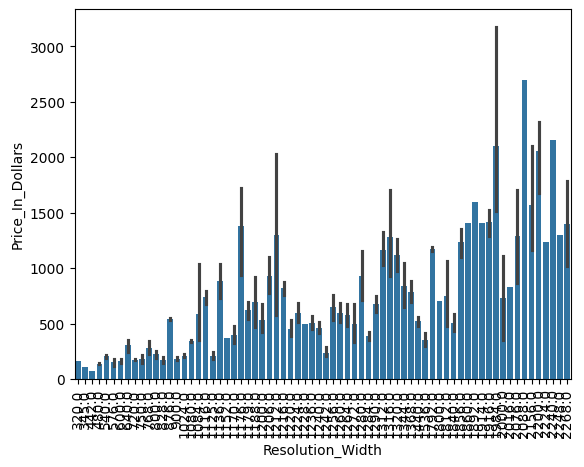

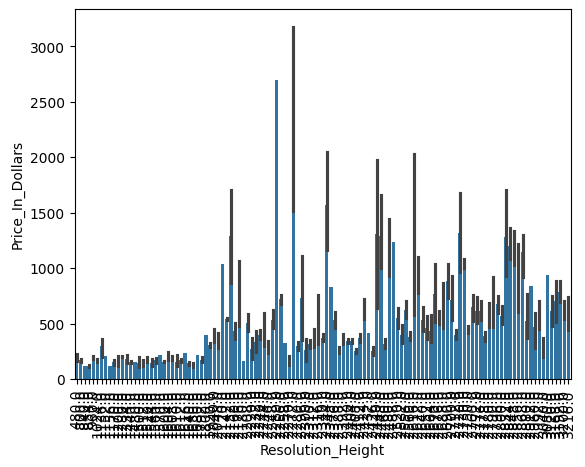

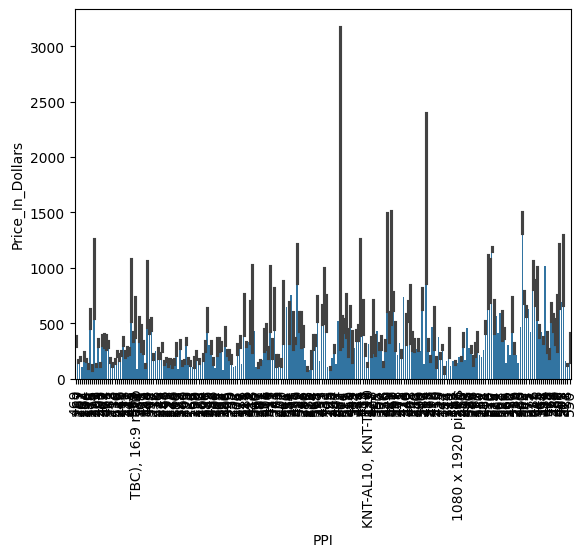

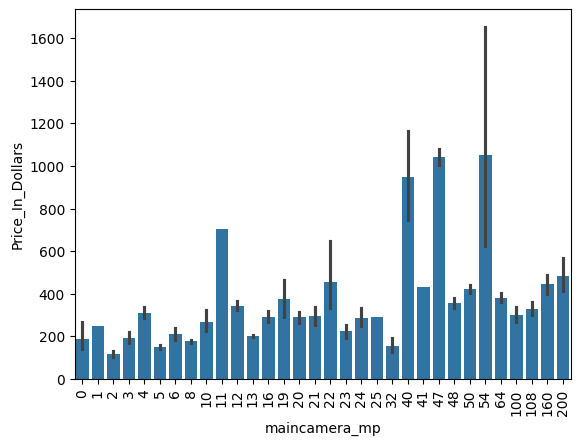

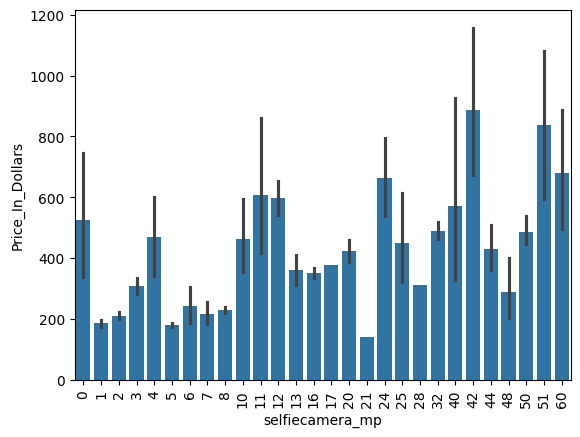

In [27]:
for column in high_cardinality_features:
    sns.barplot(data = df, x = column, y = 'Price_In_Dollars')
    plt.xticks(rotation= 90)
    plt.show()

###### selfiecamera_mp

    - Resolved the selfie camera in to a useful column.
    -



    Keep the phones without selfie camera as 0 MP.

    - Set phones with Selfie Camera MP == 0:
        - Some of the phones doesn't even have selfie cameras.
        - Some phones are using main camera's as selfie cameras.


In [28]:
uses_main_cameras = ['ZTE nubia X', 'ZTE nubia Z20', 'Microsoft Surface Duo', 'Asus Zenfone 6 ZS630KL', 'Asus Zenfone 7', 'Asus Zenfone 7 Pro', 'Asus Zenfone 8 Flip', 
'Honor 7i', 'Huawei Mate X', 'Xiaomi Mi Mix Alpha', 'vivo NEX Dual Display', 'Samsung Galaxy A80', 'Oppo N1', 'Oppo N1 mini']

In [29]:
df['selfiecamera_mp'] = df['selfiecamera_mp'].replace(0, np.nan)

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/3078265168.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['selfiecamera_mp'] = df['selfiecamera_mp'].replace(0, np.nan)


In [30]:
df['selfiecamera_mp'] = df['selfiecamera_mp'].astype('float')

In [31]:
def fill_mp(row):
    if row['Name'] in uses_main_cameras:
        return row['maincamera_mp']
    return 0

df.loc[df['selfiecamera_mp'].isna(), 'selfiecamera_mp'] = df[df['selfiecamera_mp'].isna()].apply(fill_mp, axis = 1)

In [32]:
df['selfiecamera_mp'] = df['selfiecamera_mp'].astype('category')

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/2927806622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = 'selfiecamera_mp', y = 'Price_In_Dollars', palette='pastel')


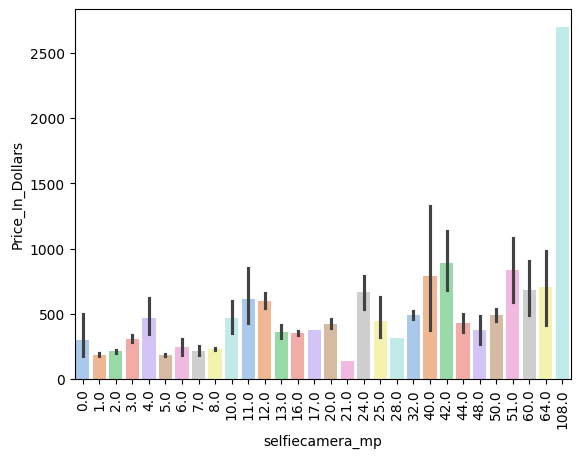

In [33]:
# Before transformation

sns.barplot(data=df, x = 'selfiecamera_mp', y = 'Price_In_Dollars', palette='pastel')
plt.xticks(rotation = 90)
plt.show()

In [34]:
def transform_selfie_camera(camera):

    if camera <= 8:
        return 'Low'
    if camera <= 16:
        return 'Medium'
    if camera <= 48:
        return 'High'
    return 'Ultra'


tempdf = df.copy()

In [35]:
tempdf['selfiecamera_mp'] = tempdf['selfiecamera_mp'].apply(transform_selfie_camera)

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/674636711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempdf, x = 'selfiecamera_mp', y = 'Price_In_Dollars', palette='pastel')


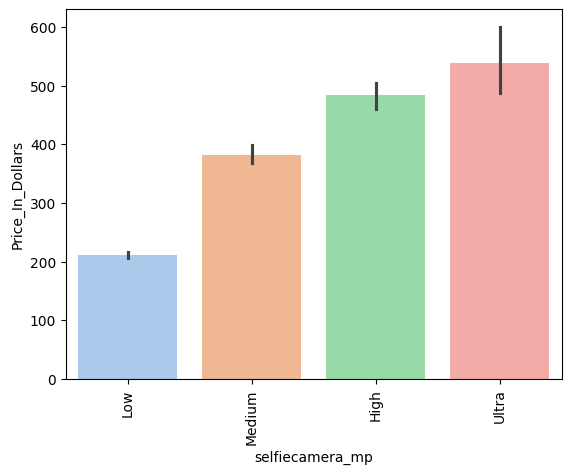

In [36]:
# After transformation
sns.barplot(data=tempdf, x = 'selfiecamera_mp', y = 'Price_In_Dollars', palette='pastel')
plt.xticks(rotation = 90)
plt.show()

###### maincamera_mp

    - Transform the column in the following way.


In [37]:
tempdf['maincamera_mp'] = tempdf['maincamera_mp'].apply(transform_selfie_camera)

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/409866563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = 'maincamera_mp', y = 'Price_In_Dollars', palette='pastel')


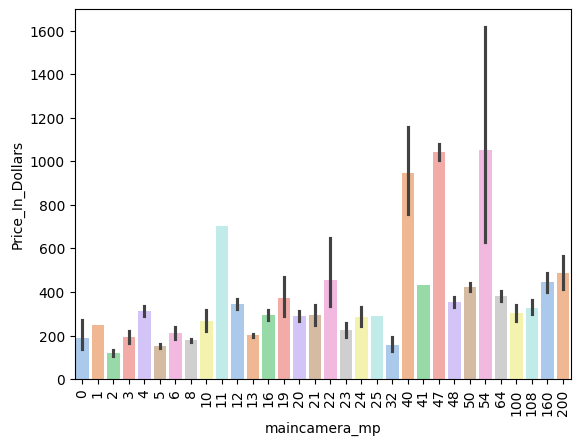

In [38]:
# Before transformation
sns.barplot(data=df, x = 'maincamera_mp', y = 'Price_In_Dollars', palette='pastel')
plt.xticks(rotation = 90)
plt.show()

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/2367857234.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempdf, x = 'maincamera_mp', y = 'Price_In_Dollars', palette='pastel', order = ['Low', 'Medium', 'High', 'Ultra'])


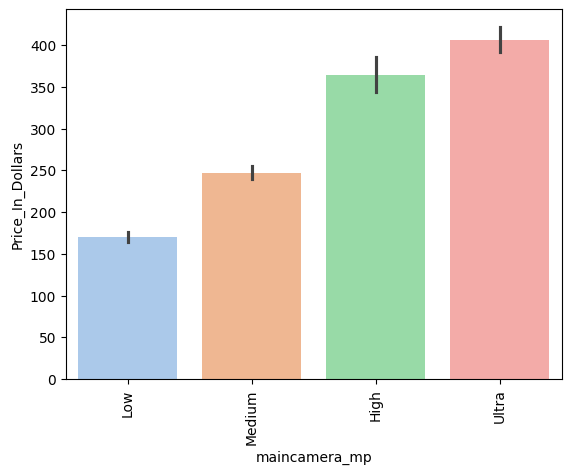

In [39]:
# After transformation
sns.barplot(data=tempdf, x = 'maincamera_mp', y = 'Price_In_Dollars', palette='pastel', order = ['Low', 'Medium', 'High', 'Ultra'])
plt.xticks(rotation = 90)
plt.show()

###### Resolution Width


/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/2597444935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = 'Resolution_Width', y = 'Price_In_Dollars', palette='pastel')


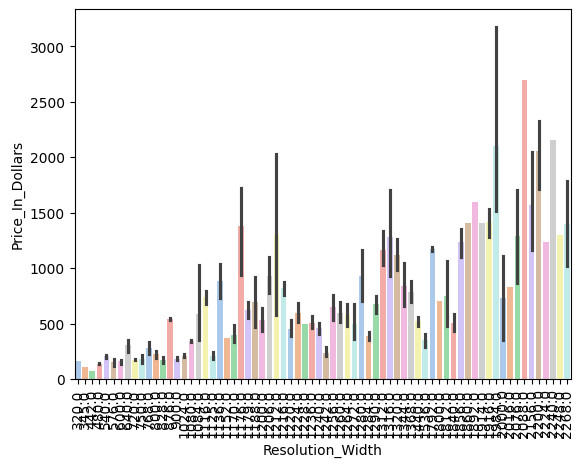

In [40]:
# Before transformation
sns.barplot(data=df, x = 'Resolution_Width', y = 'Price_In_Dollars', palette='pastel')
plt.xticks(rotation = 90)
plt.show()

In [41]:
def transform_resolution_display(res):
    if res < 1366:
        return 'Low'
    elif res < 1920:
        return 'Medium'
    else:
        return 'High'

In [42]:
tempdf['Resolution_Width'] = df['Resolution_Width'].apply(transform_resolution_display)

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/4206265484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tempdf, x = 'Resolution_Width', y = 'Price_In_Dollars', palette='pastel', order = ['Low', 'Medium', 'High'])


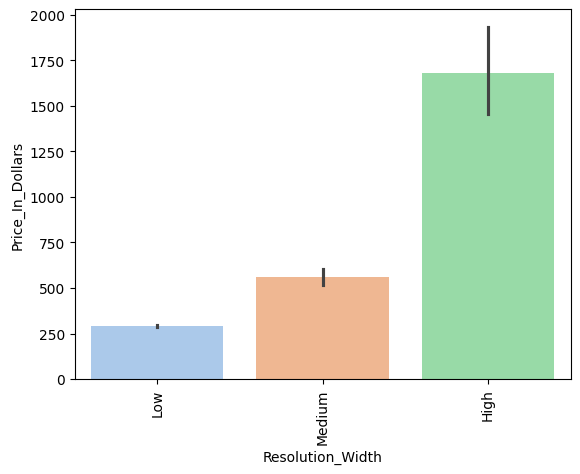

In [43]:
# After transformation
sns.barplot(data=tempdf, x = 'Resolution_Width', y = 'Price_In_Dollars', palette='pastel', order = ['Low', 'Medium', 'High'])
plt.xticks(rotation = 90)
plt.show()

###### Resolution Height


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = x, y = y, palette='pastel')


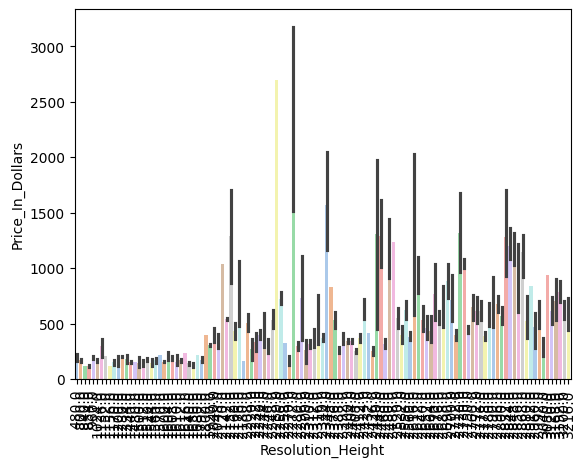

In [44]:
from src.eda import plot_before_transformation

plot_before_transformation(df, 'Resolution_Height', 'Price_In_Dollars')

In [59]:
def transform_resolution_display(res):
    if res < 1080:
        return 'Low'
    elif res < 2160:
        return 'Medium'
    else:
        return 'High'

In [60]:
tempdf['Resolution_Height'] = df['Resolution_Height'].apply(transform_resolution_display)

/var/folders/fd/mwtfcb8151d_f4770qn_971w0000gn/T/ipykernel_17159/1732822197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Resolution_Height'] = df['Resolution_Height'].apply(transform_resolution_display)


/Users/jaswanth/mydocs/myprojects/Mobile Price Prediction/src/eda.py:124: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = x, y = y, palette='pastel', order = order)


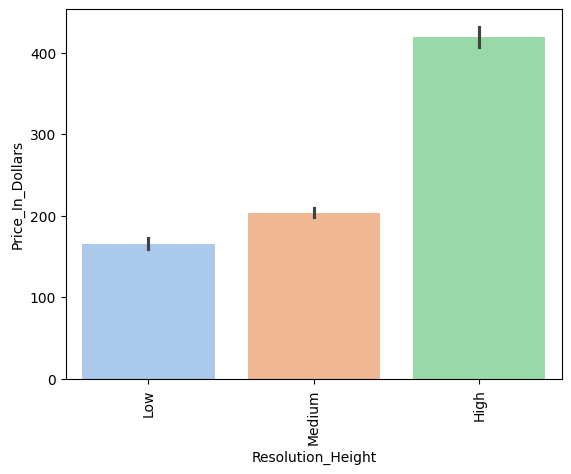

In [62]:
# After transformation
from src.eda import plot_after_transformation

plot_after_transformation(tempdf, 'Resolution_Height', 'Price_In_Dollars', ['Low', 'Medium', 'High'])